# Feedforward Artificial Neural Network

First experimented with removing and adding layers to the model.

Originally the model had 1 flattening layer, 2 Dense layers and 1 Dense Softmax layer, this resulted in an accuracy of 0.97 with a loss of around 0.15.

Removing all but the flattening layer and the Dense softmax output layer resulted in a smaller decrease in accuracy than expected, dropping from around 0.97 to around 0.92.

Removing every layer other than the flattening layer resulted in an accuracy of 0 and a consistent loss of 20.6895.

Adding a total of 8 Dense layers resulted in a much slower training time (around 15 seconds extra for each epoch) without any increase to the model accuracy, actually lowering the original accuracy by about 0.1.

Regularisation parameters allow you to apply penalties to each layer's parameters which are taken into account when calculating the loss function.

Next experimented with modifying the kernel regularisation parameter of the Dense layers, which was initially 0.005, which is a regularisation penalty added to the model's loss function. This model uses an L2 regularisation penalty -- loss = l2 * reduce_sum(square(x))

Changing this value to 0.8 reduced the accuracy to 0.1135.

Using the L1 regularisation penalty -- loss = l2 * reduce_sum(abs(x)) -- with the initial value of 0.005 reduced the accuracy to around 0.89.

Using the L1L2 regularisation penalty, a combination of L1 and L2, with the value of 0.0005 for each value resulted in a small decrease in accuracy to around 0.95.

Using the OrthogonalRegulariser regularisation penalty which encourages input vectors to be orthogonal to each other, resulted in a much longer training time of around 50 seconds per epoch but did increase the accuracy to 0.98.


# Convolutional Neural Network

I attempted to apply a CNN to the keras dataset CIFAR10, a dataset containing 60,000 images belonging to 10 different sets (airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck), mostly following along with this tutorial https://www.geeksforgeeks.org/cifar-10-image-classification-in-tensorflow/.

This began with loading the dataset and splitting it into a training image and label set, and a test image and label set.

The CNN model's input layer first applies 32 3x3 filters with a ReLU activation function to the images with max pooling, then 64 filters, then 128 filters. The output of this is then flattened and then has a dropout applied to help prevent overfitting.

A hidden dense ReLU layer is next applied, with another dropout applied after.

The output layer applies softmax in another dense layer.

This CNN took approximately 1 hour to complete 10 epochs of training, with ~2,400,000 parameters. This training resulted in a 0.92 accuracy of the training set and a 0.82 accuracy on the test set.

# Handwritten digits recognition (using Multilayer Perceptron)

> - 🤖 See [full list of Machine Learning Experiments](https://github.com/trekhleb/machine-learning-experiments) on **GitHub**<br/><br/>
> - ▶️ **Interactive Demo**: [try this model and other machine learning experiments in action](https://trekhleb.github.io/machine-learning-experiments/)

## Experiment overview

In this experiment we will build a [Multilayer Perceptron](https://en.wikipedia.org/wiki/Multilayer_perceptron) (MLP) model using [Tensorflow](https://www.tensorflow.org/) to recognize handwritten digits.

A **multilayer perceptron** (MLP) is a class of feedforward artificial neural network. An MLP consists of, at least, three layers of nodes: an input layer, a hidden layer and an output layer. Except for the input nodes, each node is a neuron that uses a nonlinear activation function. MLP utilizes a supervised learning technique called backpropagation for training. Its multiple layers and non-linear activation distinguish MLP from a linear perceptron. It can distinguish data that is not linearly separable.

![digits_recognition_mlp.png](https://github.com/trekhleb/machine-learning-experiments/blob/master/demos/src/images/digits_recognition_mlp.png?raw=1)

## Import dependencies

- [tensorflow](https://www.tensorflow.org/) - for developing and training ML models.
- [matplotlib](https://matplotlib.org/) - for plotting the data.
- [seaborn](https://seaborn.pydata.org/index.html) - for plotting confusion matrix.
- [numpy](https://numpy.org/) - for linear algebra operations.
- [pandas](https://pandas.pydata.org/) - for displaying training/test data in a table.
- [math](https://docs.python.org/3/library/math.html) - for calculating square roots etc.
- [datetime](https://docs.python.org/3.8/library/datetime.html) - for generating a logs folder names.

In [2]:
# Selecting Tensorflow version v2 (the command is relevant for Colab only).
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import math
import datetime
import platform

print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)
# print('Keras version:', tf.keras.__version__)

Python version: 3.10.12
Tensorflow version: 2.12.0


## Load the data

The **training** dataset consists of 60000 28x28px images of hand-written digits from `0` to `9`.

The **test** dataset consists of 10000 28x28px images.

In [4]:
mnist_dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


## Explore the data

Here is how each image in the dataset looks like. It is a 28x28 matrix of integers (from `0` to `255`). Each integer represents a color of a pixel.

In [6]:
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


This matrix of numbers may be drawn as follows:

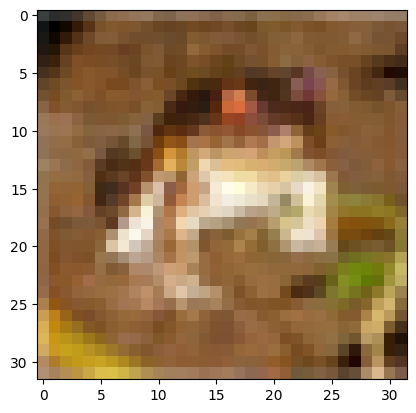

In [37]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

Let's print some more training examples to get the feeling of how the digits were written.

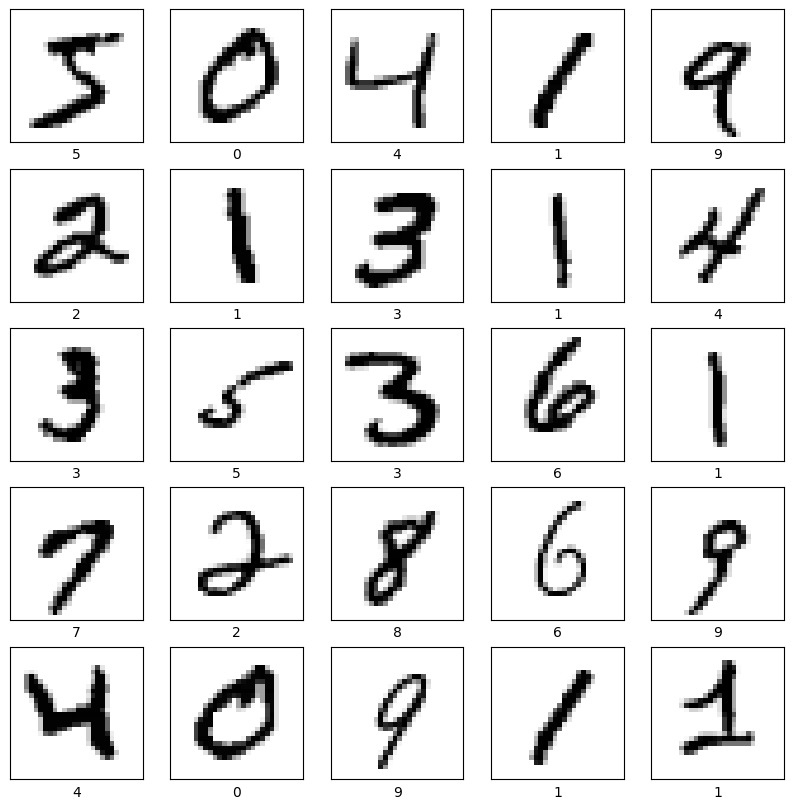

In [8]:
numbers_to_display = 25
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10,10))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

## Normalize the data

Here we're just trying to move from values range of `[0...255]` to `[0...1]`.

In [9]:
x_train_normalized = x_train / 255
x_test_normalized = x_test / 255

In [10]:
with pd.option_context('display.float_format', '{:,.2f}'.format):
    display(pd.DataFrame(x_train_normalized[0]))

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.69,0.10,0.65,1.00,0.97,0.50,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.12,0.14,...,0.88,0.67,0.99,0.95,0.76,0.25,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.19,0.93,0.99,...,0.36,0.32,0.32,0.22,0.15,0.00,0.00,0.00,0.00,0.00
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.07,0.86,0.99,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.31,0.61,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Let's see how the digits look like after normalization. We're expecting it to look similar to original.

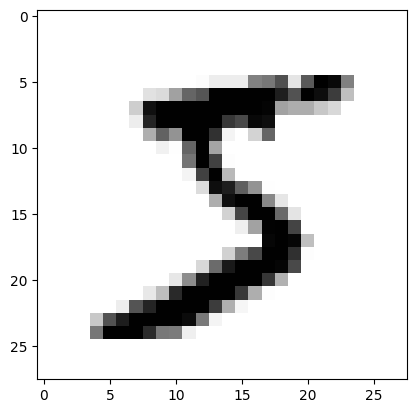

In [11]:
plt.imshow(x_train_normalized[0], cmap=plt.cm.binary)
plt.show()

## Build the model

We will use [Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential?version=stable) Keras model with 4 layers:

- Layer 1: [Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten?version=stable) layer that will flatten image 2D matrix into 1D vector.
- Layer 2: **Input** [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense?version=stable) layer with `128` neurons and [ReLU](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu?version=stable) activation.
- Layer 3: **Hidden** [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense?version=stable) layer with `128` neurons and [ReLU](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu?version=stable) activation.
- Layer 4: **Output** [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense?version=stable) layer with `10` [Softmax](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax?version=stable) outputs. The output represents the network guess. The 0-th output represents a probability that the input digit is `0`, the 1-st output represents a probability that the input digit is `1` and so on...

In this example we will use `kernel_regularizer` parameter of the layer to control overfitting of the model. Another common approach to fight overfitting though might be using a [dropout layers](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) (i.e. `tf.keras.layers.Dropout(0.2)`).

In [12]:
model = tf.keras.models.Sequential()

# Input layers.
model.add(tf.keras.layers.Flatten(input_shape=x_train_normalized.shape[1:]))
model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu,
    kernel_regularizer=tf.keras.regularizers.OrthogonalRegularizer(0.001, mode="rows")
))

# Hidden layers.
model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu,
    kernel_regularizer=tf.keras.regularizers.OrthogonalRegularizer(0.001, mode="rows")
))

# Output layers.
model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax
))

Here is our model summary so far.

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In order to plot the model the `graphviz` should be installed. For Mac OS it may be installed using `brew` like `brew install graphviz`.

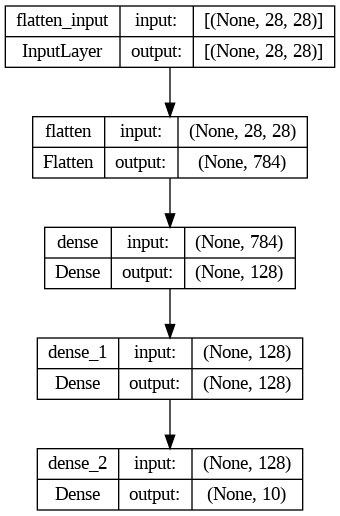

In [14]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

## Compile the model

In [15]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

## Train the model

In [16]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train_normalized,
    y_train,
    epochs=10,
    validation_data=(x_test_normalized, y_test),
    callbacks=[tensorboard_callback]
)

Epoch 1/10
1875/1875 [==============================] - 36s 18ms/step - loss: 0.2333 - accuracy: 0.9301 - val_loss: 0.1300 - val_accuracy: 0.9610
Epoch 2/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0977 - accuracy: 0.9707 - val_loss: 0.1001 - val_accuracy: 0.9679
Epoch 3/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0692 - accuracy: 0.9793 - val_loss: 0.0823 - val_accuracy: 0.9735
Epoch 4/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0520 - accuracy: 0.9832 - val_loss: 0.0828 - val_accuracy: 0.9744
Epoch 5/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0411 - accuracy: 0.9866 - val_loss: 0.0772 - val_accuracy: 0.9773
Epoch 6/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0323 - accuracy: 0.9892 - val_loss: 0.0836 - val_accuracy: 0.9763
Epoch 7/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0286 - accuracy: 0.9905 - val_loss: 0.0866 -

Let's see how the loss function was changing during the training. We expect it to get smaller and smaller on every next epoch.

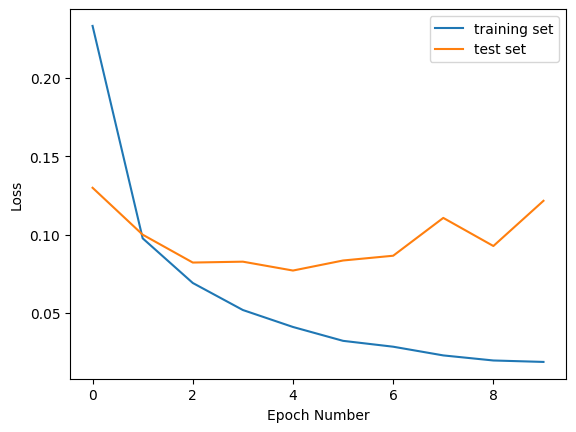

In [17]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='test set')
plt.legend()

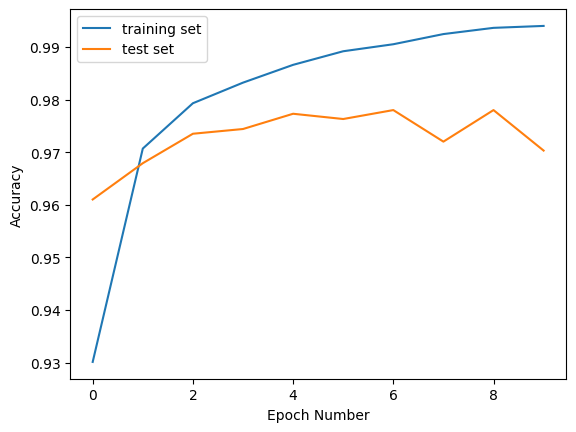

In [18]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='test set')
plt.legend()

## Evaluate model accuracy

We need to compare the accuracy of our model on **training** set and on **test** set. We expect our model to perform similarly on both sets. If the performance on a test set will be poor comparing to a training set it would be an indicator for us that the model is overfitted and we have a "high variance" issue.

### Training set accuracy

In [19]:
%%capture
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train)

In [20]:
print('Training loss: ', train_loss)
print('Training accuracy: ', train_accuracy)

Training loss:  0.024909470230340958
Training accuracy:  0.9915000200271606


### Test set accuracy

In [21]:
%%capture
validation_loss, validation_accuracy = model.evaluate(x_test_normalized, y_test)

In [22]:
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

Validation loss:  0.12167327851057053
Validation accuracy:  0.970300018787384


## Save the model

We will save the entire model to a `HDF5` file. The `.h5` extension of the file indicates that the model should be saved in Keras format as HDF5 file. To use this model on the front-end we will convert it (later in this notebook) to Javascript understandable format (`tfjs_layers_model` with .json and .bin files) using [tensorflowjs_converter](https://www.tensorflow.org/js/tutorials/conversion/import_saved_model) as it is specified in the [main README](https://github.com/trekhleb/machine-learning-experiments).

In [23]:
model_name = 'digits_recognition_mlp.h5'
model.save(model_name, save_format='h5')

In [24]:
loaded_model = tf.keras.models.load_model(model_name)

## Use the model (do predictions)

To use the model that we've just trained for digits recognition we need to call `predict()` method.

In [25]:
predictions_one_hot = loaded_model.predict([x_test_normalized])

313/313 [==============================] - 1s 2ms/step


In [26]:
print('predictions_one_hot:', predictions_one_hot.shape)

predictions_one_hot: (10000, 10)


Each prediction consists of 10 probabilities (one for each number from `0` to `9`). We need to pick the digit with the highest probability since this would be a digit that our model most confident with.

In [27]:
# Predictions in form of one-hot vectors (arrays of probabilities).
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,8.514207e-12,1.424301e-08,2.755346e-09,2.818060e-07,7.755815e-14,3.684842e-11,1.690862e-13,9.999996e-01,9.940897e-11,7.173252e-08
1,5.620399e-14,7.112369e-12,9.999999e-01,2.465724e-10,4.643847e-19,9.889811e-20,6.391127e-17,3.602540e-11,3.318603e-13,4.748601e-22
2,2.622066e-05,9.983522e-01,4.057701e-07,5.363196e-08,1.261600e-06,1.997292e-04,1.582727e-05,4.715708e-06,1.399585e-03,4.024794e-08
3,9.999997e-01,5.106581e-13,5.083851e-09,5.199576e-10,1.454711e-11,9.599440e-12,1.334172e-07,2.480836e-08,9.375075e-10,7.514079e-08
4,2.474648e-13,1.344038e-11,3.106920e-12,1.210568e-14,9.999843e-01,5.000817e-12,2.301959e-12,3.291805e-08,7.355036e-12,1.564959e-05
...,...,...,...,...,...,...,...,...,...,...
9995,1.866851e-21,1.991141e-10,9.999999e-01,1.134122e-10,1.201521e-26,5.205022e-22,2.500436e-24,3.653912e-09,2.294299e-18,7.576091e-23
9996,8.260268e-16,1.498777e-11,9.962287e-12,9.999998e-01,8.061136e-16,1.749708e-09,1.903293e-22,5.110547e-13,8.291165e-11,1.430037e-07
9997,3.339663e-18,1.005723e-12,6.540012e-19,9.755618e-15,9.999999e-01,1.765220e-15,5.152686e-16,4.360267e-09,1.166672e-08,1.714483e-08
9998,9.472031e-17,3.023131e-14,1.461661e-16,4.880594e-13,1.038452e-22,9.999999e-01,3.573821e-16,4.704649e-12,2.702238e-10,1.340155e-16


In [28]:
# Let's extract predictions with highest probabilites and detect what digits have been actually recognized.
predictions = np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


So our model is predicting that the first example from the test set is `7`.

In [29]:
print(predictions[0])

7


Let's print the first image from a test set to see if model's prediction is correct.

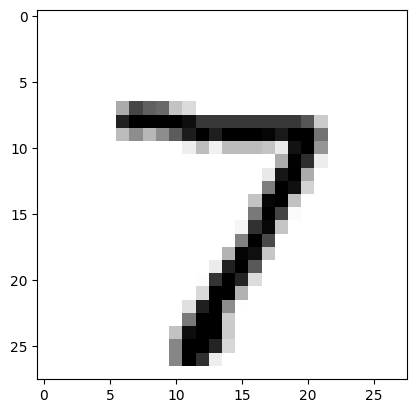

In [30]:
plt.imshow(x_test_normalized[0], cmap=plt.cm.binary)
plt.show()

We see that our model made a correct prediction and it successfully recognized digit `7`. Let's print some more test examples and correspondent predictions to see how model performs and where it does mistakes.

<ipython-input-31-c94a8ea0f999>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(num_cells, num_cells, plot_index + 1)


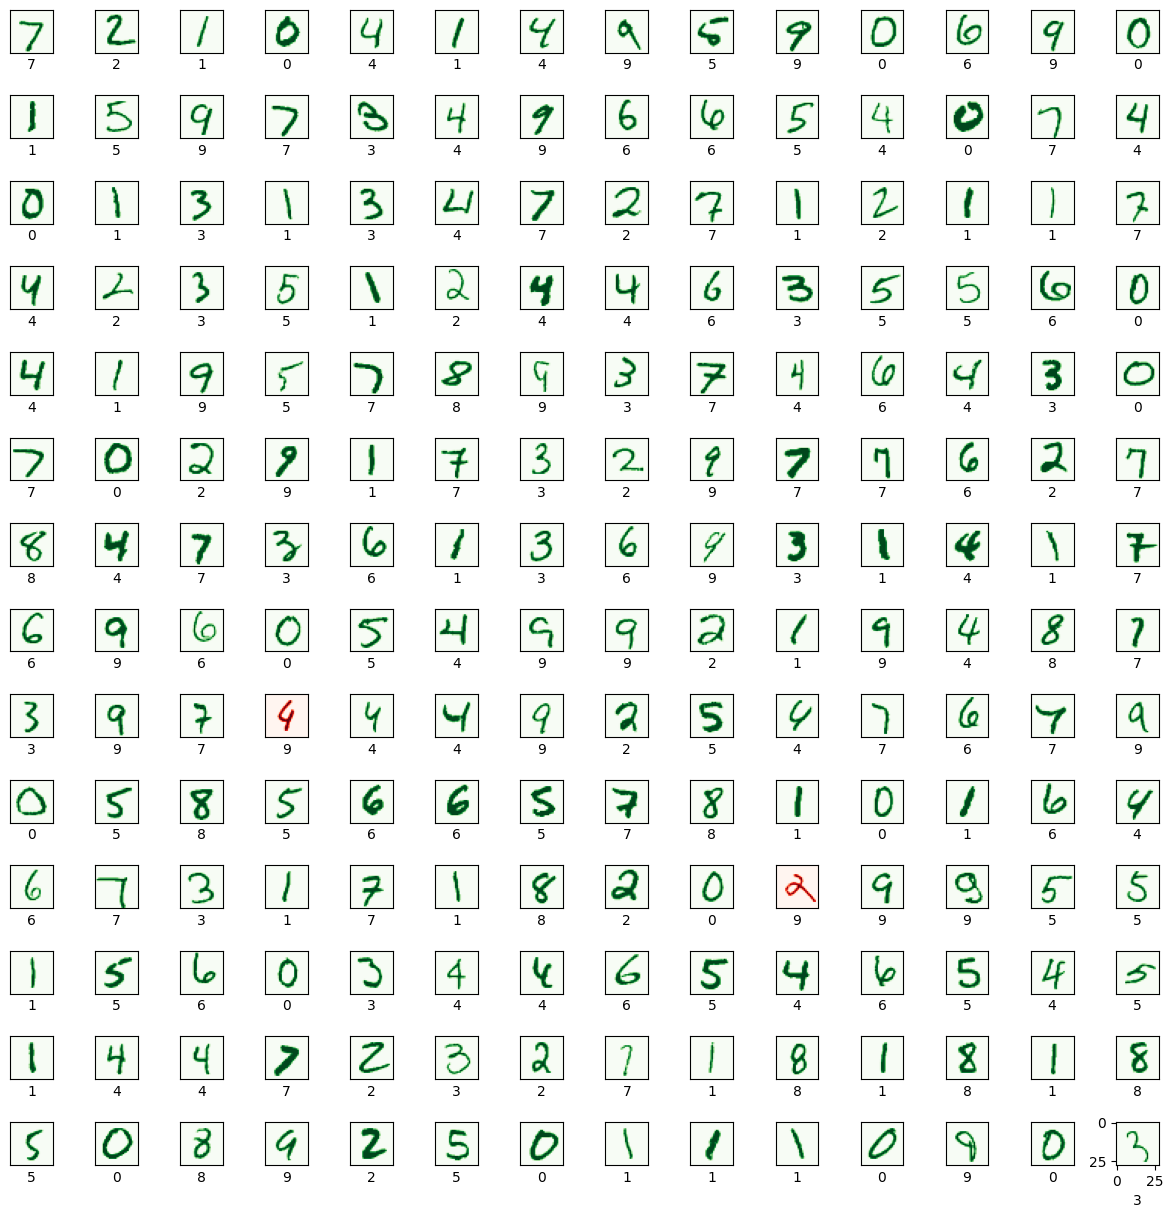

In [31]:
numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_test[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_test_normalized[plot_index], cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

## Plotting a confusion matrix

[Confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix) shows what numbers are recognized well by the model and what numbers the model usually confuses to recognize correctly. You may see that the model performs really well but sometimes (28 times out of 10000) it may confuse number `5` with `3` or number `2` with `3`.

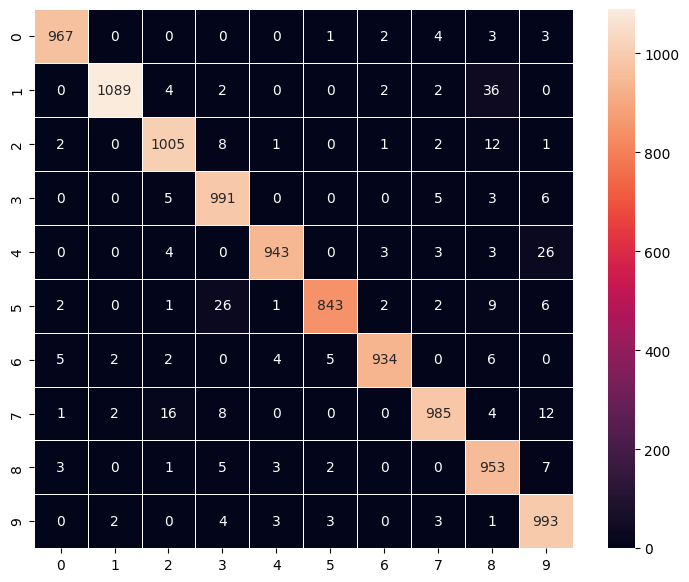

In [32]:
confusion_matrix = tf.math.confusion_matrix(y_test, predictions)
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

## Converting the model to web-format

To use this model on the web we need to convert it into the format that will be understandable by [tensorflowjs](https://www.tensorflow.org/js). To do so we may use [tfjs-converter](https://github.com/tensorflow/tfjs/tree/master/tfjs-converter) as following:

```
tensorflowjs_converter --input_format keras \
  ./experiments/digits_recognition_mlp/digits_recognition_mlp.h5 \
  ./demos/public/models/digits_recognition_mlp
```

You find this experiment in the [Demo app](https://trekhleb.github.io/machine-learning-experiments) and play around with it right in you browser to see how the model performs in real life.

In [33]:
mnist_dataset = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [34]:
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (50000, 32, 32, 3)
y_train: (50000, 1)
x_test: (10000, 32, 32, 3)
y_test: (10000, 1)


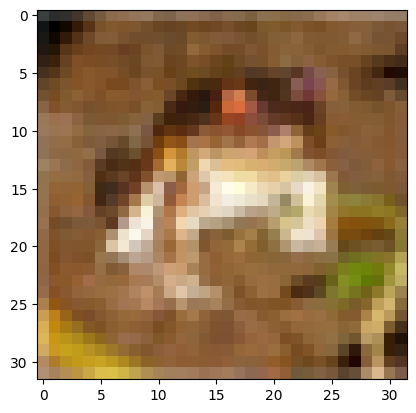

In [40]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


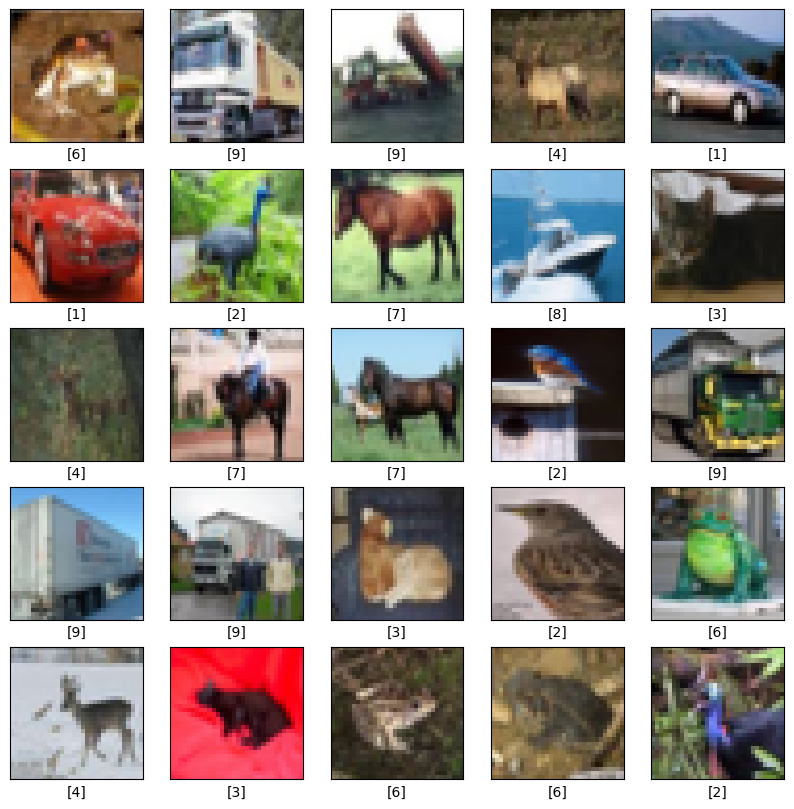

In [41]:
numbers_to_display = 25
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10,10))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [62]:
x_train_normalized = x_train / 255
x_test_normalized = x_test / 255
y_train, y_test = y_train.flatten(), y_test.flatten()

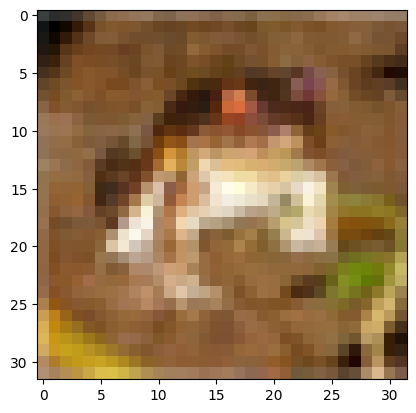

In [43]:
plt.imshow(x_train_normalized[0], cmap=plt.cm.binary)
plt.show()

In [63]:
len(set(y_train))

10

In [64]:
model = tf.keras.models.Sequential()

# Input layers.
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=x_train[0].shape))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.2))

# Hidden layer
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

# Output layer
model.add(tf.keras.layers.Dense(len(set(y_train)), activation='softmax'))

In [65]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_6 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_7 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

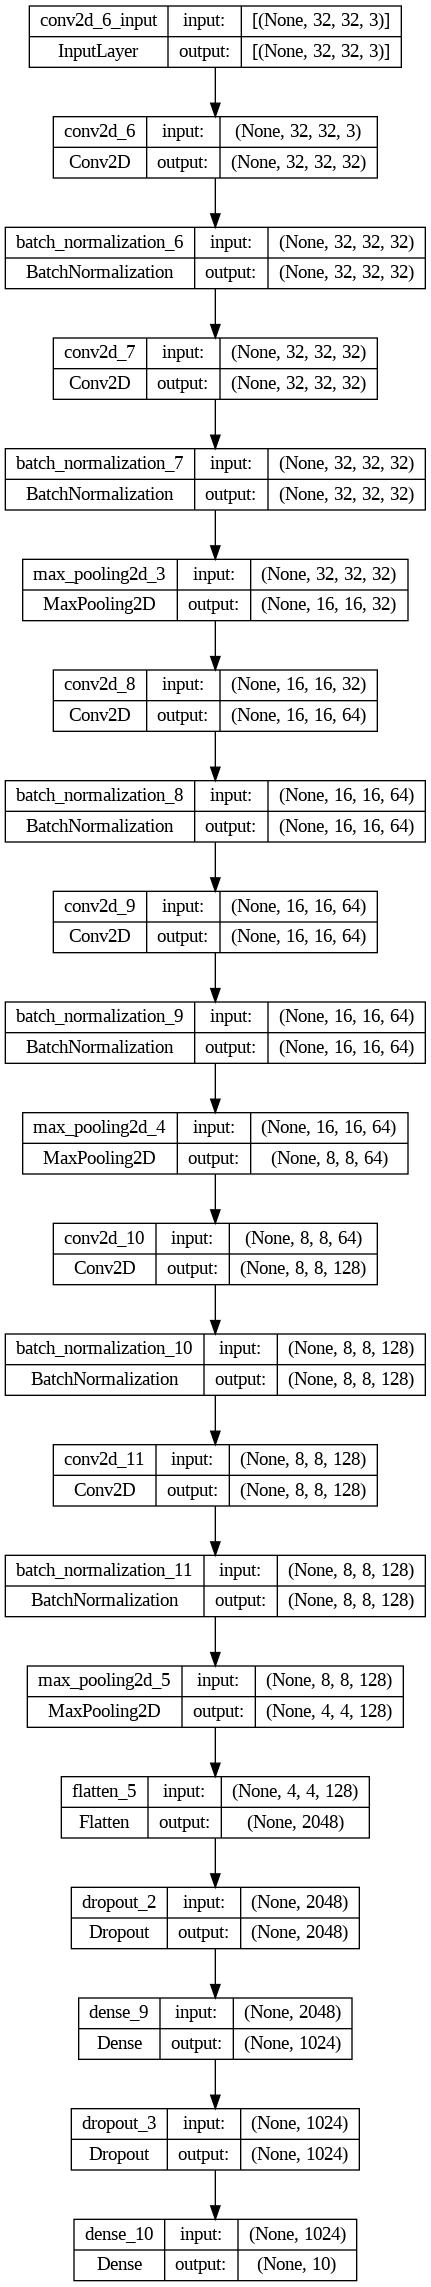

In [66]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

In [67]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [68]:
training_history = model.fit(
    x_train_normalized,
    y_train,
    epochs=10,
    validation_data=(x_test_normalized, y_test),
)

Epoch 1/10
1563/1563 [==============================] - 518s 330ms/step - loss: 1.2984 - accuracy: 0.5508 - val_loss: 1.1181 - val_accuracy: 0.6235
Epoch 2/10
1563/1563 [==============================] - 504s 322ms/step - loss: 0.8329 - accuracy: 0.7099 - val_loss: 0.8755 - val_accuracy: 0.6905
Epoch 3/10
1563/1563 [==============================] - 502s 321ms/step - loss: 0.6835 - accuracy: 0.7649 - val_loss: 0.7780 - val_accuracy: 0.7423
Epoch 4/10
1563/1563 [==============================] - 506s 324ms/step - loss: 0.5859 - accuracy: 0.7980 - val_loss: 0.6836 - val_accuracy: 0.7747
Epoch 5/10
1563/1563 [==============================] - 503s 322ms/step - loss: 0.4947 - accuracy: 0.8289 - val_loss: 0.6257 - val_accuracy: 0.7939
Epoch 6/10
1563/1563 [==============================] - 496s 317ms/step - loss: 0.4213 - accuracy: 0.8548 - val_loss: 0.9331 - val_accuracy: 0.6816
Epoch 7/10
1563/1563 [==============================] - 497s 318ms/step - loss: 0.3523 - accuracy: 0.8774 - val_

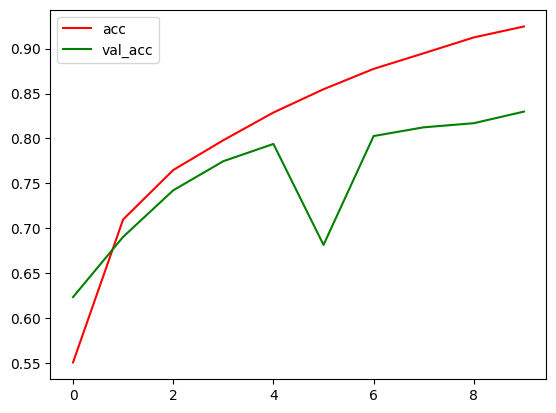

In [70]:
plt.plot(training_history.history['accuracy'], label='acc', color='red')
plt.plot(training_history.history['val_accuracy'], label='val_acc', color='green')
plt.legend()

1/1 [==============================] - 0s 28ms/step
Original label is truck and predicted label is truck


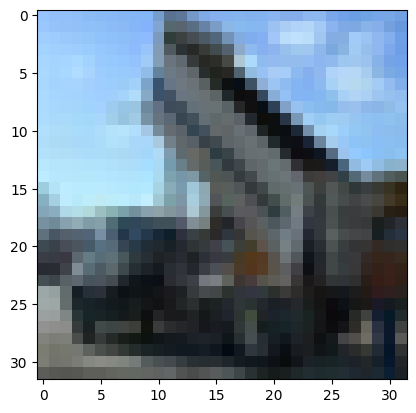

In [85]:
labels = '''airplane automobile bird cat deer dog frog horse ship truck'''.split()

image_number = 50

plt.imshow(x_test[image_number])
test_image = np.array(x_test[image_number])

test_image = test_image.reshape(1, 32, 32, 3)

predicted_label = labels[model.predict(test_image).argmax()]

original_label = labels[y_test[image_number]]

print("Original label is {} and predicted label is {}".format(
    original_label, predicted_label))
